# Pregunta 1
## Importar librerías y .csv

In [47]:
import pandas as pn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pn.read_csv('nations.csv', encoding='latin-1', index_col=0)
variables_de_interes = ['chldmort', 'adfert', 'life']

# Pregunta 2
## Refactor gráficos matplotlib a seaborn


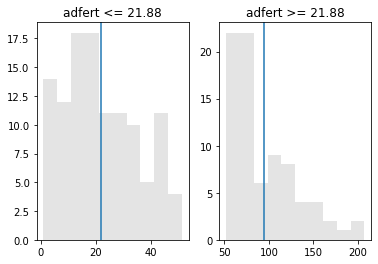

In [3]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))

binarize_histogram(df, 'adfert')

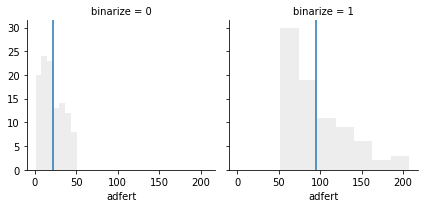

In [5]:
variable = 'adfert'
df['binarize'] = np.where(df[variable] > np.mean(df[variable]), 1, 0)
hist_1 = df[df['binarize'] == 1][variable].dropna()
hist_0 = df[df['binarize'] == 0][variable].dropna()

# plt.subplot(1, 2, 1)
# sns.distplot(hist_0, kde = False, color='lightgrey', )
# plt.axvline(np.mean(hist_0))
# plt.subplot(1, 2, 2)
# sns.distplot(hist_1, kde = False, color='lightgrey')
# plt.axvline(np.mean(hist_1))

g = sns.FacetGrid(df, col='binarize', col_wrap=2 )
g.facet_axis(0,0)
plt.axvline(np.mean(hist_0))
g.facet_axis(0,1)
plt.axvline(np.mean(hist_1))
g = g.map(sns.distplot, variable, kde=False,color='lightgrey' )

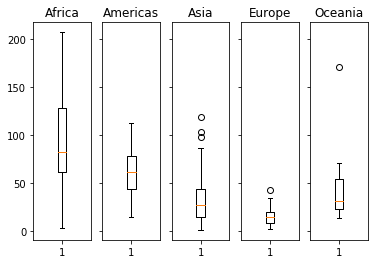

In [6]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)
    
grouped_boxplot(df, 'adfert', 'region')

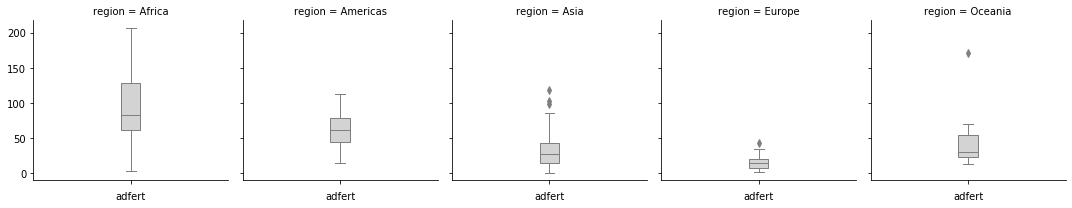

In [7]:
group_by =  'region'
variable = 'adfert'
stratify_by = df[group_by].unique()
g = sns.FacetGrid(df, col=group_by)
g = g.map(sns.boxplot, variable, orient  = "v", order = stratify_by, width = .1, color='lightgrey', linewidth=1)

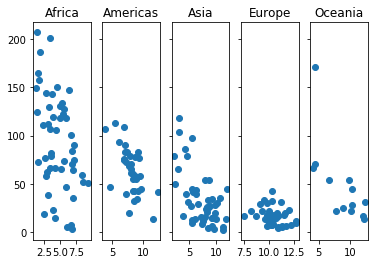

In [8]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
grouped_scatterplot(df, 'school', 'adfert', 'region')

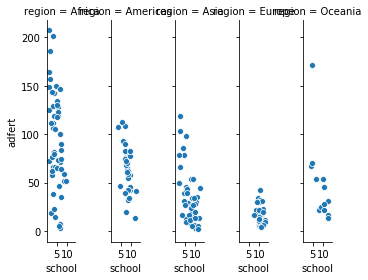

In [9]:
group_by =  'region'
variable_x = 'school'
variable_y = 'adfert'

stratify_by = df[group_by].unique()
g = sns.FacetGrid(df, col=group_by)
g.fig.set_size_inches(5,4)
g = g.map(sns.scatterplot, variable_x, variable_y)

# Pregunta 3
## Genere un heatmap entre todas las variables

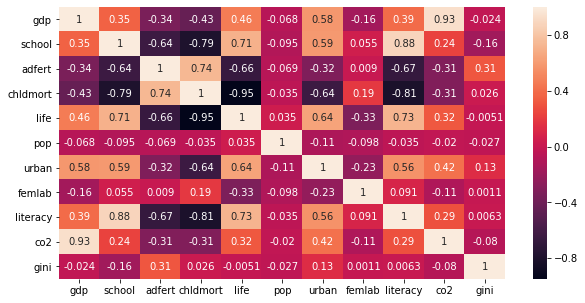

In [40]:
sub_df = df.loc[:,'gdp':'gini'].dropna().corr()
plt.rcParams['figure.figsize'] = (10,5)
sns.heatmap(sub_df, annot = True)

La matriz de correlación obtenida indica que:
- Existe una importante correlación (0.74) entre las variables 'adfert' y 'chldmort', lo que indica que existe una relación directamente proporcional entre ambas variables.
- Existe una fuerte correlación (-0.95) entre las variables 'chldmort' y 'life', lo que indica que existe una relación inversamente proporcional entre ambas variables.
- Existe una importante correlación (-0.66) entre las variables 'adfert' y 'life', lo que indica que existe una relación inversamente proporcional entre ambas variables.


# Pregunta 4
## En base a las principales correlaciones, sepárelas en un nuevo objeto y calcule la matriz de correlaciones para todas las regiones

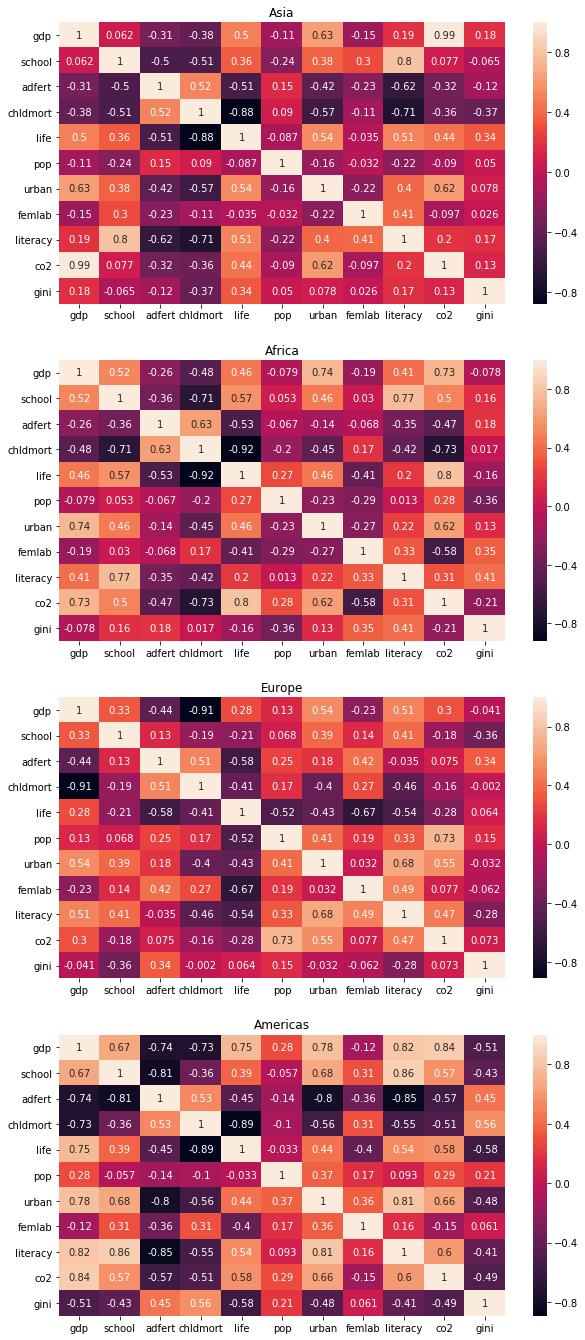

In [54]:
sub_df = df.loc[:,'region':'gini'].dropna()
lista_regiones = sub_df['region'].value_counts()
plt.rcParams['figure.figsize'] = (10,30)
i = 1
for region, cuenta in lista_regiones.iteritems():
    df_tmp = sub_df[sub_df['region'] == region]
    matriz_correlacion_tmp = df_tmp.corr()
    plt.subplot(5, 1, i)
    plt.title(region)
    sns.heatmap(matriz_correlacion_tmp, annot = True)
    i += 1